epoch: 1 loss: 0.12798 acc: 0.961 loss(test): 0.14857 acc(test): 0.954
epoch: 2 loss: 0.09249 acc: 0.972 loss(test): 0.11539 acc(test): 0.965
epoch: 3 loss: 0.07605 acc: 0.977 loss(test): 0.10252 acc(test): 0.970
epoch: 4 loss: 0.06584 acc: 0.980 loss(test): 0.09384 acc(test): 0.973
epoch: 5 loss: 0.06078 acc: 0.981 loss(test): 0.08659 acc(test): 0.976
epoch: 6 loss: 0.05433 acc: 0.984 loss(test): 0.08048 acc(test): 0.976
epoch: 7 loss: 0.05181 acc: 0.984 loss(test): 0.08398 acc(test): 0.975
epoch: 8 loss: 0.04643 acc: 0.986 loss(test): 0.07857 acc(test): 0.977
epoch: 9 loss: 0.04584 acc: 0.986 loss(test): 0.07940 acc(test): 0.977
epoch:10 loss: 0.04278 acc: 0.987 loss(test): 0.07715 acc(test): 0.978


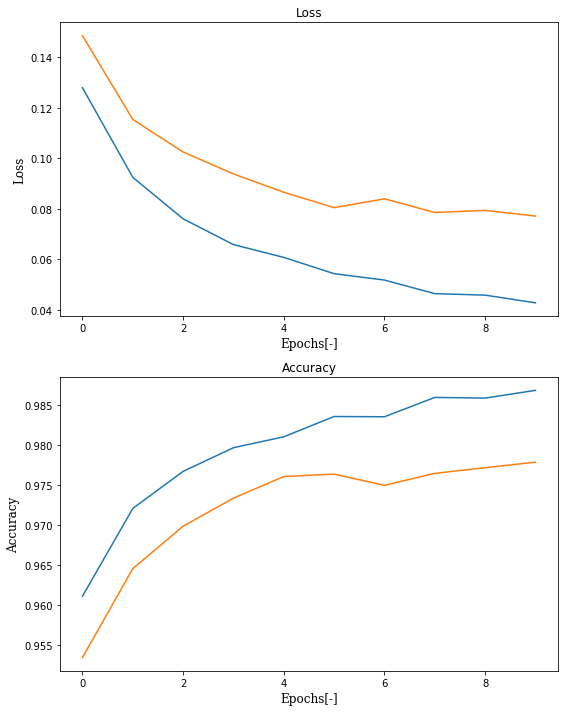

In [4]:
# Authors: Daichi Yoshikawa <daichi.yoshikawa@gmail.com>
# License: BSD 3 clause

from __future__ import absolute_import

import sys
sys.path.append('../../')

import pickle
import numpy as np
import dnn
from dnn.neuralnet import NeuralNetwork
from dnn.utils.nn_utils import scale_normalization

from dnn.training.optimizer import Adam, AdaGrad, AdaDelta, Momentum
from dnn.training.random_weight import RandomWeight
from dnn.training.loss_function import LossFunction

from dnn.layers.affine import AffineLayer
from dnn.layers.activation import Activation, ActivationLayer
from dnn.layers.dropout import DropoutLayer
from dnn.layers.batch_norm import BatchNormLayer

def get_mnist():
    x = np.load('input1.npy')
    x = np.r_[x, np.load('input2.npy')]
    x = np.r_[x, np.load('input3.npy')]
    x = np.r_[x, np.load('input4.npy')]
    x = np.r_[x, np.load('input5.npy')]
    x = np.r_[x, np.load('input6.npy')]
    x = np.r_[x, np.load('input7.npy')]
    x = x.astype(float)
    
    y = np.load('output.npy')
    y = y.astype(float)
    
    return x, y

dtype = np.float32
model = NeuralNetwork(input_shape=(784), dtype=dtype)
model.add(DropoutLayer(drop_ratio=0.2))
model.add(AffineLayer(shape=(784, 200), random_weight=RandomWeight.Type.he))
model.add(BatchNormLayer())
model.add(ActivationLayer(activation=Activation.Type.relu))
model.add(DropoutLayer(drop_ratio=0.5))
model.add(AffineLayer(shape=(200, 10), random_weight=RandomWeight.Type.xavier))
model.add(BatchNormLayer())
model.add(ActivationLayer(activation=Activation.Type.softmax))
model.compile()

x, y = get_mnist()
scale_normalization(x)

optimizer = AdaGrad(learning_rate=5e-2, weight_decay=1e-3, dtype=dtype)

lc = model.fit(
        x=x,
        y=y,
        epochs=10,
        batch_size=100,
        optimizer=optimizer,
        loss_function=LossFunction.Type.multinomial_cross_entropy,
        learning_curve=True,
        shuffle=True,
        shuffle_per_epoch=True,
        test_data_ratio=0.142857 # Use 60,000 for training and 10,000 for test.
)

lc.plot(figsize=(8,10), fontsize=12)